In [161]:
import networkx as nx
from networkx.generators.random_graphs import erdos_renyi_graph
import numpy as np
import random
from random import sample
import matplotlib.pyplot as plt
import matplotlib
from math import factorial


In [105]:
# initial colouring function
def X0(G, q):
    
    """
    This function assigns a coloring to a graph G. The assignation is by numbers from 0 up to q-1, where q is the number of color to use

    Arguments
    ---------
    G: netwrokx object Graph. The graph to be coloured
    q: int. Number of colours to use

    Return
    ------
    X: dict with keys the nodes of the graph and values the color numbers assigned to each node
    """
    Nodes = G.nodes
    colors =  list(range(q))
    
    X = dict.fromkeys(Nodes) # a dict with the color for each vertex
    for v in Nodes:
        neighbors = G.neighbors(v)   
        taken = list(X[w] for w in neighbors)
        c = random.choice([color for color in colors if color not in taken])
        X[v] = c     # color number c "
             
    return X


def Coloring(X,COLORS):

    """
    This function assigns actual colors tu the numbers assigned in X0 function

    Arguments
    --------
    X: dict. A dictionary with the assignation of numbers (colors) to each node
    q: int. Number of colors

    Return
    -------
    colors_X: a dict with keys the nodes of the graph and values the colors from the list of COLORS
    """
    colors_X = X.copy()
    for v in X.keys():
        colors_X[v] = COLORS[X[v]]
    
    return colors_X


def plot_graph_with_colors(G, coloring, title):

    """
    This function plots a graph G (object graph) with coloured nodes according to the dict coloring

    Arguments:
    ----------
    G: networkx object: a graph
    coloring: dict: a dictionary with keys the nodes of the graph G and values the colours assigned
    """
    pos = nx.spring_layout(G, seed=3113794652)  # positions for all nodes
    values = [coloring.get(node, k) for node, k in zip(G.nodes(),coloring.values())]
    plt.figure(figsize = (12,6))
    nx.draw(G, pos = pos, node_color = values,with_labels =True)
    plt.title(title)



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[(0, 1), (0, 2), (0, 4), (0, 8), (0, 9), (1, 2), (1, 3), (1, 8), (1, 9), (2, 3), (2, 5), (2, 6), (2, 7), (2, 8), (3, 4), (3, 5), (3, 6), (3, 8), (4, 6), (4, 8), (5, 8), (5, 9), (6, 8), (6, 9), (8, 9)]
9
7
{0: 7, 1: 1, 2: 5, 3: 2, 4: 6, 5: 7, 6: 4, 7: 2, 8: 3, 9: 2}


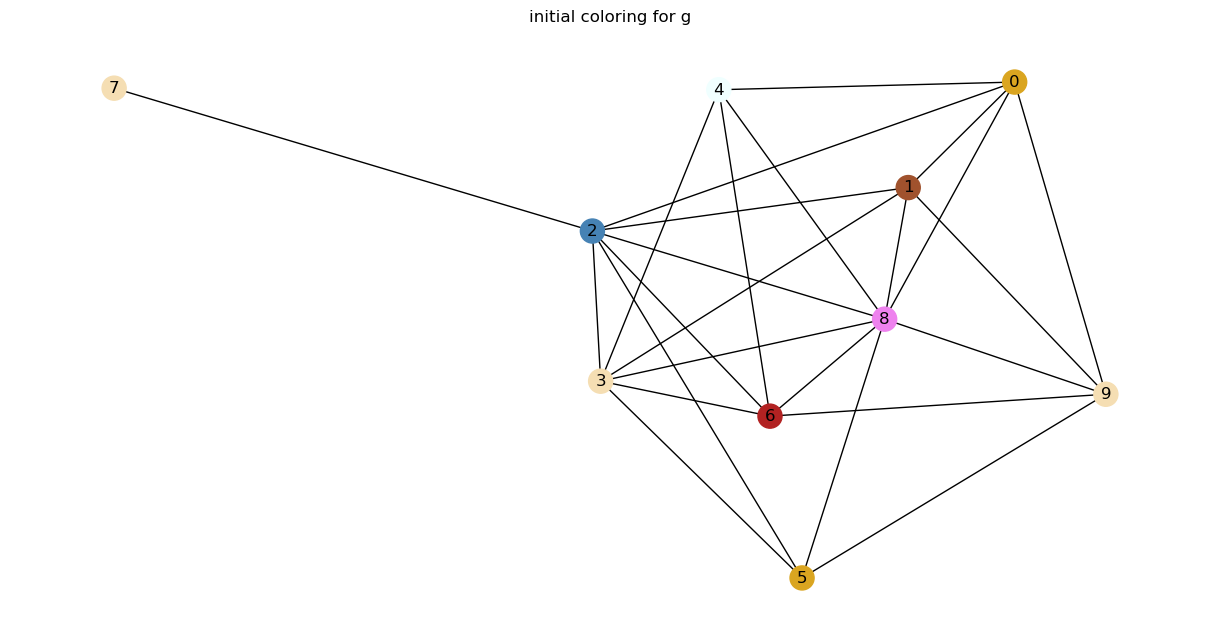

In [106]:
# Example 2:
n = 10
p = 0.5
g = erdos_renyi_graph(n, p)

print(g.nodes)
print(g.edges)

Nodes = list(g.nodes)
Edges = list(g.edges)
d = max(dict(g.degree).values())
q = d + 1

print(q)


COLORS = random.sample(list(matplotlib.colors.cnames.values()), k = q)

color_numbers = X0(g, q)
coloring = Coloring(color_numbers, COLORS)
plot_graph_with_colors(g, coloring, title = "initial coloring for g")

print(len(set(coloring.values())))
print(color_numbers)

In [107]:
g.edges

EdgeView([(0, 1), (0, 2), (0, 4), (0, 8), (0, 9), (1, 2), (1, 3), (1, 8), (1, 9), (2, 3), (2, 5), (2, 6), (2, 7), (2, 8), (3, 4), (3, 5), (3, 6), (3, 8), (4, 6), (4, 8), (5, 8), (5, 9), (6, 8), (6, 9), (8, 9)])

4
4


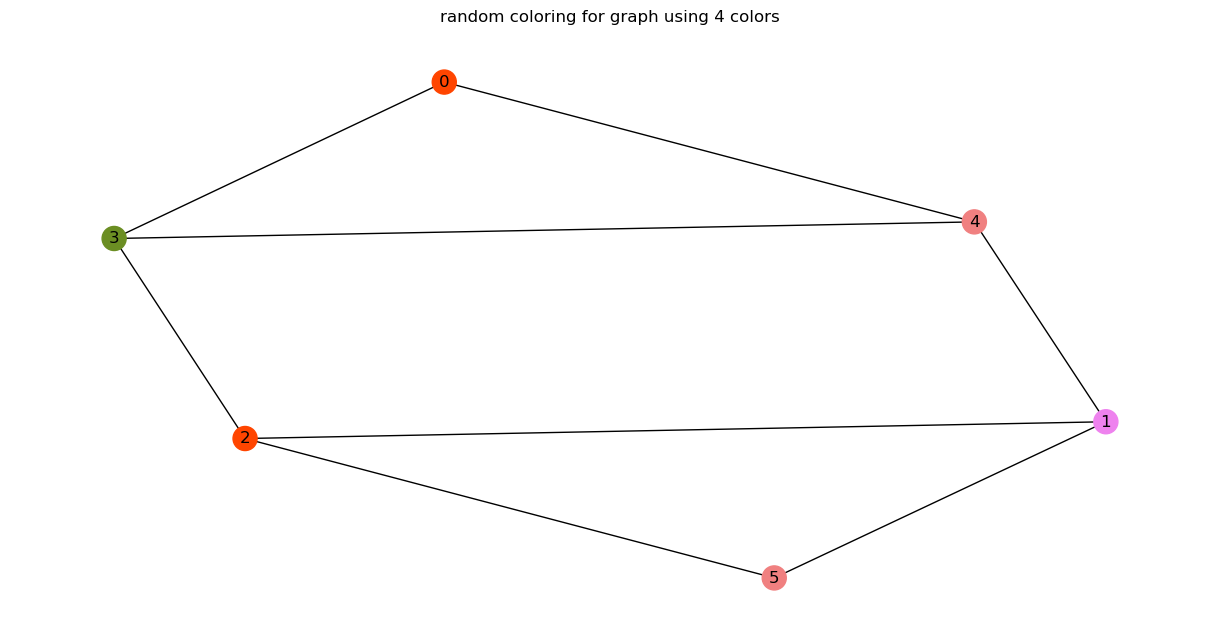

In [108]:
#Example 1:
G = {0: [3,4], 1: [2,4,5], 2: [1,3,5], 3: [0, 2, 4], 4: [0,1,3], 5: [1, 2]}
d = max([len(G[v]) for v in G.keys()])
Nodes = list(G.keys())
q = d+1
print(q)
COLORS = random.sample(list(matplotlib.colors.cnames.values()), k = q)

# create graph from G
graph = nx.Graph()
graph.add_nodes_from(Nodes)
for node in Nodes:
    #print([(node, i) for i in G[node]])
    graph.add_edges_from([(node, i) for i in G[node]])

color_numbers = X0(graph, q)
print(len(set(color_numbers.values())))
coloring = Coloring(color_numbers, COLORS)
num_colors_used = len(set(coloring.values()))
plot_graph_with_colors(graph, coloring, title= "random coloring for graph using " + f"{num_colors_used}" + " colors")


# Estimate the amount of q-colourings in a graph

In [143]:
def color(R, taken):
    for item in R:
        if item not in taken:
            return item

def update(X, v, neighbors, q):
    R = np.random.permutation(q)
    taken = [X[w] for w in neighbors] #+ [X[v]]
    X[v] = color(R, taken)   
    return X




q = 6
{'A': '#A0522D', 'B': '#AFEEEE', 'C': '#800000', 'D': '#A0522D', 'E': '#F08080', 'F': '#EEE8AA', 'H': '#EEE8AA', 'G': '#F08080'}
{'A': 3, 'B': 2, 'C': 4, 'D': 3, 'E': 0, 'F': 1, 'H': 1, 'G': 0}
5
{'A': '#A0522D', 'B': '#AFEEEE', 'C': '#800000', 'D': '#800000', 'E': '#F08080', 'F': '#EEE8AA', 'H': '#EEE8AA', 'G': '#F08080'}
{'A': 3, 'B': 2, 'C': 4, 'D': 4, 'E': 0, 'F': 1, 'H': 1, 'G': 0}


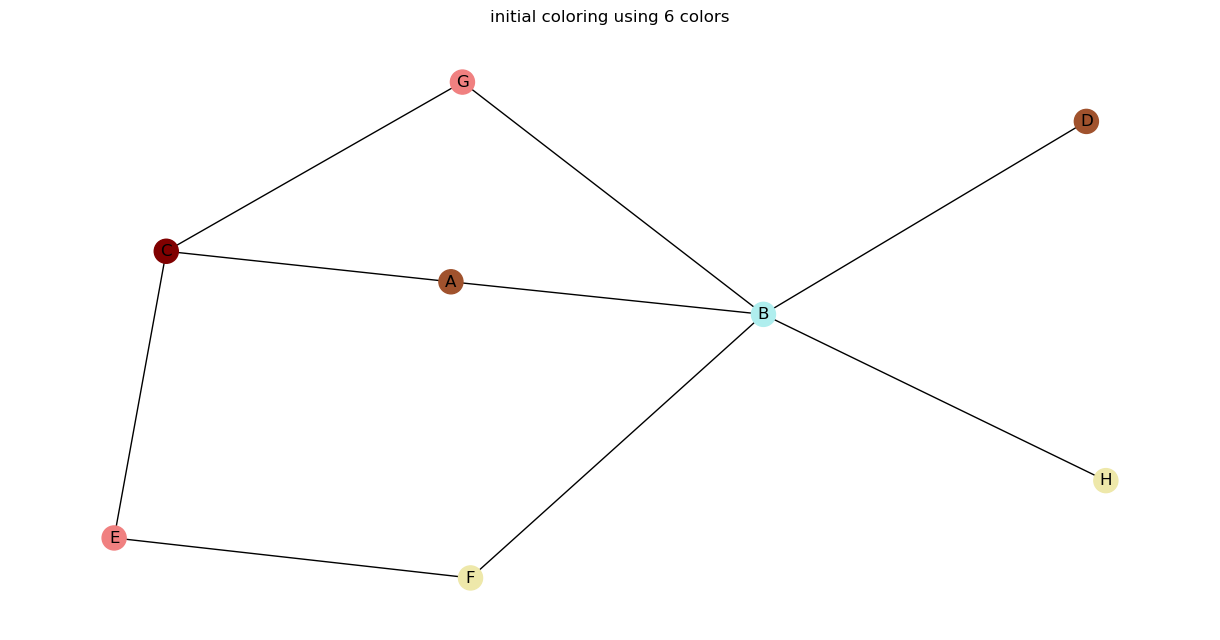

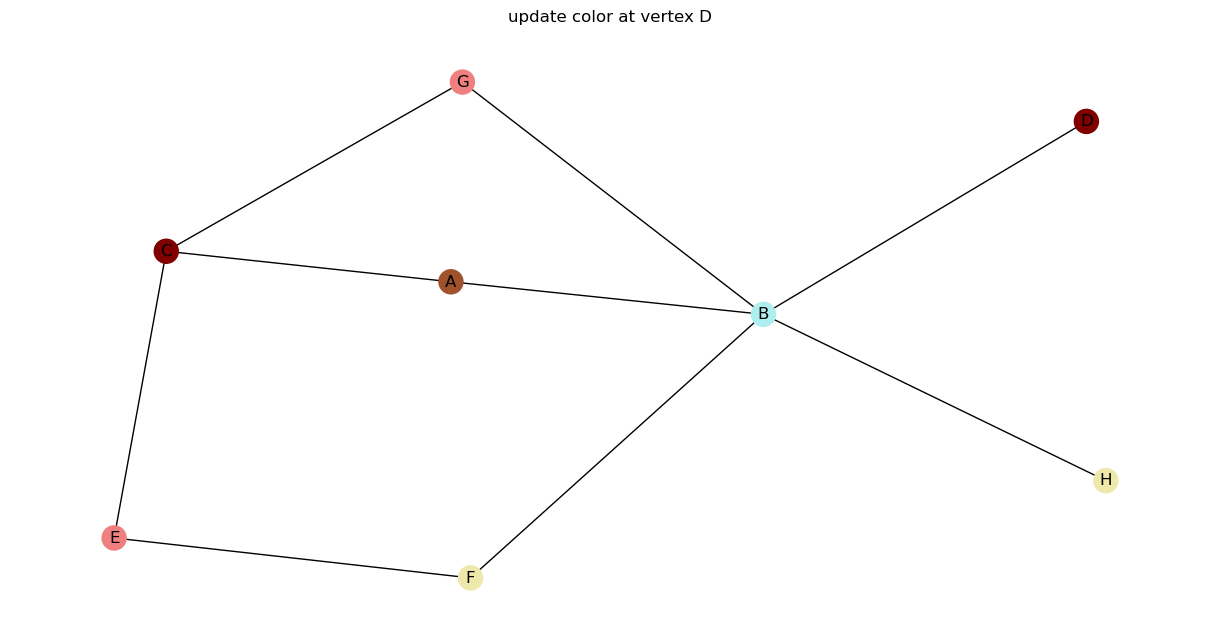

In [144]:
# Example:
G = nx.Graph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])
q = max(dict(G.degree).values()) + 1 # num of colors

print("q = {}".format(q))
COLORS = random.sample(list(matplotlib.colors.cnames.values()), k = q)

initial_color = X0(G, q)
initial_coloring = Coloring(initial_color, COLORS)
print(initial_coloring)
print(initial_color)
actual_num_colors = len(set(initial_color.values()))
print(actual_num_colors)

plot_graph_with_colors(G, initial_coloring, title = "initial coloring using " + f"{q}" + " colors")
#plot_graph_with_colors(G, initial_color, title = "initial coloring using " + f"{actual_num_colors}" + " colors")


v = random.choice(list(G.nodes))
neighbors = G.neighbors(v)
update_color_at_v = update(initial_color, v, neighbors, q)
updated_coloring_at_v = Coloring(update_color_at_v, COLORS)
print(updated_coloring_at_v)
print(update_color_at_v)

plot_graph_with_colors(G, updated_coloring_at_v, title = "update color at vertex " + f"{v}")
#plot_graph_with_colors(G, update_color_at_v, title = "update color at vertex " + f"{v}")




In [145]:


def CyclicGibbs(G, q, num_iter):
    """
    
    Arguments
    ----------
    G: networkx object graph with attributes nodes and edges
    q: int. Number of colourings
    num_iter: int. Number of iterations
    """

    Nodes = G.nodes
    k = len(Nodes)
    X = X0(G, q)
    for n in range(num_iter):
        v = Nodes[n%k]
        neighbors = G.neighbors(v)
        X = update(X, v, neighbors, q)
    return X






In [146]:
def estimated_colorings(Nodes, Edges, q, num_iter):
    """
    This function estimates the number of colourings in a graph G=(Nodes, Edges)

    Parameters
    -----------
    Nodes: (List) the set of nodes of the complete graph G
    Edges: (List of tuples) the set of all edges of graph G
    q :  (int) number of colors
    num_iter: (int) number of simulations
    """

    e = len(Edges)
    k = len(Nodes)
    Q = np.ones((e+1)) #Q[j] is the estimated Z_j/Z_{j-1}
    Q[0] = q**k
    g = nx.Graph() # creates a Graph object
    g.add_nodes_from(Nodes) 
    for j in range(1,e+1):
        X = X0(g, q) # initial colouring for the Markov chain
        N = 0
        for n in range(num_iter):
            v = Nodes[n%k]
            neighbors = g.neighbors(v)
            X = update(X, v, neighbors, q)
            if X[Edges[j-1][0]] != X[Edges[j-1][1]]:
                N = N + 1
    
        Q[j] = N/num_iter
        g.add_edge(*Edges[j-1])
        #print(Q)
    return np.prod(Q)


In [148]:
# Example 1

Nodes = [1, 2, 3, 4]
Edges = [(1, 2), (1, 4), (2, 3), (3, 4)]
q = 4
num_iter = 10**4
estimated_colorings(Nodes, Edges, q, num_iter)


84.20770055388856

[0, 1, 2, 3]
[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
4
{0: 2, 1: 3, 2: 0, 3: 1}
the exact result for a complete graph with 4 vertices is 4!, that is 24
the estimated number of 4-colorings is 23.92622775960888


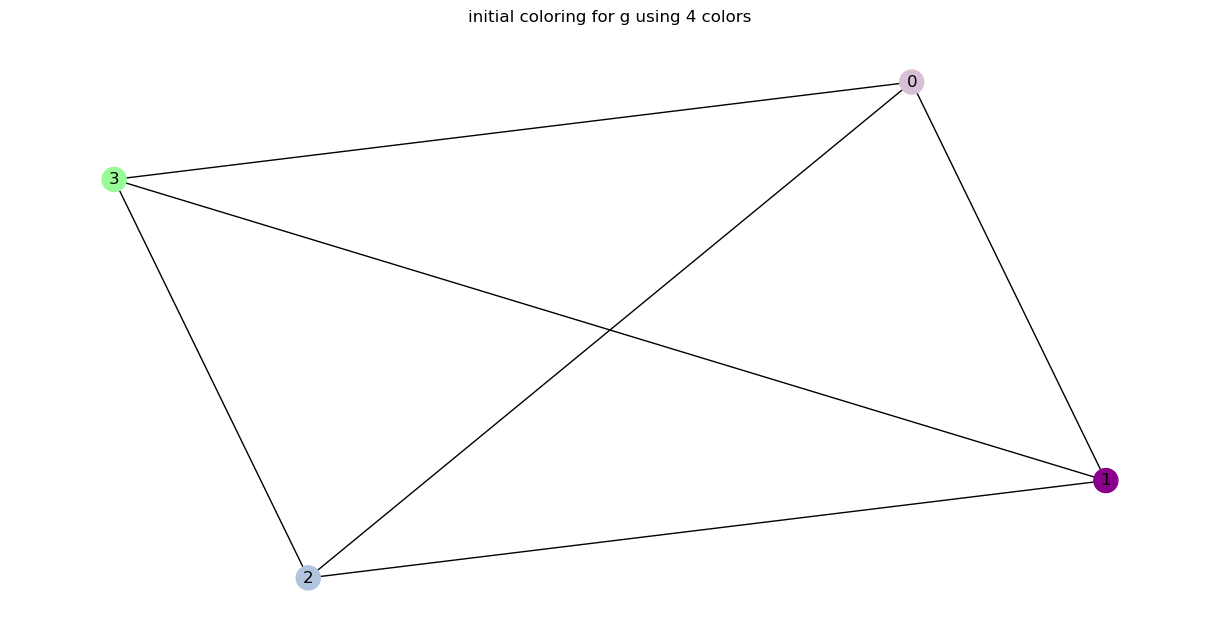

In [182]:
# example 2
n = 4
p = 1
g = erdos_renyi_graph(n, p)

print(g.nodes)
print(g.edges)

Nodes = list(g.nodes)
Edges = list(g.edges)
d = max(dict(g.degree).values())
q = d + 1

COLORS = random.sample(list(matplotlib.colors.cnames.values()), k = q)

color_numbers = X0(g, q)
coloring = Coloring(color_numbers, COLORS)
plot_graph_with_colors(g, coloring, title = "initial coloring for g using " + f"{q}" + " colors")

print(len(set(coloring.values())))
print(color_numbers)
num_iter = 10**4
estimation = estimated_colorings(Nodes, Edges, q, num_iter)
print("the exact result for a complete graph with {} vertices is {}!, that is {}".format(n, n, factorial(n)))
print("the estimated number of {}-colorings is {}".format(q, estimation))

In [137]:
def CyclicGibbs_coupling(G, Nodes, X_0, Y_0, q, num_iter):
    colors = list(range(q))
    C_X = X_0
    C_Y = Y_0
    k = len(Nodes)
    for n in range(num_iter):
        R = np.random.permutation(q)
        v = Nodes[n%k]
        taken_X = [C_X[w] for w in G[v]]
        C_X[v] = color(R, taken_X)
        taken_Y = [C_Y[w] for w in G[v]]
        C_Y[v] = color(R, taken_Y)
        print("\n", C_X, C_Y)
    return(C_X, C_Y)
        

In [139]:
# Example 2:
n = 30
p = 0.1
g = erdos_renyi_graph(n, p)

print(g.nodes)
print(g.edges)

Nodes = list(g.nodes)
d = max(dict(g.degree).values())
Edges = list(g.edges)
X_0 = X0(g, d)
Y_0 = X0(g, d)
q =  d + 1 #2*d**2 +1
eps = 0.0001
k = len(Nodes)
num_iter = int((k*np.log(k)+np.log(1/eps)-np.log(d))/np.log(q/(2*d**2))) + 1

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[(0, 15), (0, 21), (1, 2), (1, 3), (1, 8), (1, 13), (1, 14), (1, 15), (2, 4), (2, 5), (2, 19), (2, 24), (3, 4), (3, 12), (3, 15), (3, 27), (4, 12), (4, 21), (5, 12), (5, 15), (5, 16), (5, 22), (5, 23), (5, 27), (6, 15), (6, 22), (6, 29), (8, 12), (8, 21), (8, 23), (9, 16), (9, 22), (9, 25), (9, 26), (10, 14), (10, 15), (10, 26), (10, 28), (11, 17), (11, 28), (12, 18), (12, 24), (12, 28), (13, 21), (13, 22), (13, 28), (16, 22), (18, 24), (18, 26), (19, 21), (19, 26), (19, 27), (20, 23), (20, 24), (20, 25), (20, 29), (23, 29), (24, 25), (27, 28)]


In [140]:
num_iter

-42

In [141]:
CyclicGibbs_coupling(g, Nodes, X_0, Y_0, q, num_iter=5)


 {0: 7, 1: 1, 2: 2, 3: 4, 4: 1, 5: 1, 6: 3, 7: 1, 8: 3, 9: 3, 10: 2, 11: 6, 12: 5, 13: 0, 14: 3, 15: 6, 16: 6, 17: 0, 18: 1, 19: 3, 20: 0, 21: 4, 22: 5, 23: 2, 24: 4, 25: 5, 26: 6, 27: 2, 28: 3, 29: 4} {0: 6, 1: 0, 2: 1, 3: 5, 4: 4, 5: 6, 6: 3, 7: 0, 8: 6, 9: 2, 10: 4, 11: 1, 12: 1, 13: 6, 14: 5, 15: 2, 16: 5, 17: 5, 18: 3, 19: 6, 20: 5, 21: 2, 22: 4, 23: 2, 24: 6, 25: 1, 26: 0, 27: 1, 28: 5, 29: 0}

 {0: 7, 1: 5, 2: 2, 3: 4, 4: 1, 5: 1, 6: 3, 7: 1, 8: 3, 9: 3, 10: 2, 11: 6, 12: 5, 13: 0, 14: 3, 15: 6, 16: 6, 17: 0, 18: 1, 19: 3, 20: 0, 21: 4, 22: 5, 23: 2, 24: 4, 25: 5, 26: 6, 27: 2, 28: 3, 29: 4} {0: 6, 1: 3, 2: 1, 3: 5, 4: 4, 5: 6, 6: 3, 7: 0, 8: 6, 9: 2, 10: 4, 11: 1, 12: 1, 13: 6, 14: 5, 15: 2, 16: 5, 17: 5, 18: 3, 19: 6, 20: 5, 21: 2, 22: 4, 23: 2, 24: 6, 25: 1, 26: 0, 27: 1, 28: 5, 29: 0}

 {0: 7, 1: 5, 2: 2, 3: 4, 4: 1, 5: 1, 6: 3, 7: 1, 8: 3, 9: 3, 10: 2, 11: 6, 12: 5, 13: 0, 14: 3, 15: 6, 16: 6, 17: 0, 18: 1, 19: 3, 20: 0, 21: 4, 22: 5, 23: 2, 24: 4, 25: 5, 26: 6, 27: 2, 28:

({0: 7,
  1: 5,
  2: 2,
  3: 4,
  4: 0,
  5: 1,
  6: 3,
  7: 1,
  8: 3,
  9: 3,
  10: 2,
  11: 6,
  12: 5,
  13: 0,
  14: 3,
  15: 6,
  16: 6,
  17: 0,
  18: 1,
  19: 3,
  20: 0,
  21: 4,
  22: 5,
  23: 2,
  24: 4,
  25: 5,
  26: 6,
  27: 2,
  28: 3,
  29: 4},
 {0: 6,
  1: 3,
  2: 2,
  3: 5,
  4: 0,
  5: 6,
  6: 3,
  7: 0,
  8: 6,
  9: 2,
  10: 4,
  11: 1,
  12: 1,
  13: 6,
  14: 5,
  15: 2,
  16: 5,
  17: 5,
  18: 3,
  19: 6,
  20: 5,
  21: 2,
  22: 4,
  23: 2,
  24: 6,
  25: 1,
  26: 0,
  27: 1,
  28: 5,
  29: 0})

In [29]:
#Example 1:
G = {0: [3,4], 1: [2,4,5], 2: [1,3,5], 3: [0, 2, 4], 4: [0,1,3], 5: [1, 2]}
d = max([len(G[v]) for v in G.keys()])
q = d + 1
Nodes = list(G.keys())
X_0 = X0(G, q)
Y_0 = X0(G, q)


In [30]:
print(X_0, Y_0)

{0: 'color 3', 1: 'color 0', 2: 'color 0', 3: 'color 1', 4: 'color 3', 5: 'color 3'} {0: 'color 3', 1: 'color 2', 2: 'color 1', 3: 'color 0', 4: 'color 2', 5: 'color 2'}


In [31]:
q = d+1#2*d**2 +1
eps = 0.001
k = len(Nodes)
num_iter = int((k*np.log(k)+np.log(1/eps)-np.log(d))/np.log(q/(2*d**2))) + 1

In [32]:
num_iter

-10

In [33]:
CyclicGibbs_coupling(G, Nodes, X_0, Y_0, q, num_iter=25)


 {0: 3, 1: 'color 0', 2: 'color 0', 3: 'color 1', 4: 'color 3', 5: 'color 3'} {0: 3, 1: 'color 2', 2: 'color 1', 3: 'color 0', 4: 'color 2', 5: 'color 2'}

 {0: 3, 1: 3, 2: 'color 0', 3: 'color 1', 4: 'color 3', 5: 'color 3'} {0: 3, 1: 3, 2: 'color 1', 3: 'color 0', 4: 'color 2', 5: 'color 2'}

 {0: 3, 1: 3, 2: 1, 3: 'color 1', 4: 'color 3', 5: 'color 3'} {0: 3, 1: 3, 2: 1, 3: 'color 0', 4: 'color 2', 5: 'color 2'}

 {0: 3, 1: 3, 2: 1, 3: 0, 4: 'color 3', 5: 'color 3'} {0: 3, 1: 3, 2: 1, 3: 0, 4: 'color 2', 5: 'color 2'}

 {0: 3, 1: 3, 2: 1, 3: 0, 4: 2, 5: 'color 3'} {0: 3, 1: 3, 2: 1, 3: 0, 4: 2, 5: 'color 2'}

 {0: 3, 1: 3, 2: 1, 3: 0, 4: 2, 5: 0} {0: 3, 1: 3, 2: 1, 3: 0, 4: 2, 5: 0}

 {0: 3, 1: 3, 2: 1, 3: 0, 4: 2, 5: 0} {0: 3, 1: 3, 2: 1, 3: 0, 4: 2, 5: 0}

 {0: 3, 1: 3, 2: 1, 3: 0, 4: 2, 5: 0} {0: 3, 1: 3, 2: 1, 3: 0, 4: 2, 5: 0}

 {0: 3, 1: 3, 2: 1, 3: 0, 4: 2, 5: 0} {0: 3, 1: 3, 2: 1, 3: 0, 4: 2, 5: 0}

 {0: 3, 1: 3, 2: 1, 3: 0, 4: 2, 5: 0} {0: 3, 1: 3, 2: 1, 3: 0, 4: 2, 5: 0}


({0: 1, 1: 3, 2: 2, 3: 3, 4: 0, 5: 1}, {0: 1, 1: 3, 2: 2, 3: 3, 4: 0, 5: 1})

In [ ]:
print(X_0, Y_0)
num_iter

'-40'

-40